<a href="https://colab.research.google.com/github/vennela28/MLnow_2.0/blob/main/EDA_OnlineRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np                                                 # Implements multi-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling                                            # For simple Exploratory data analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

Mounting the Drive to perform EDA on the dataset

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
cd '/content/drive/MyDrive/EDA_OnlineRetail'

/content/drive/MyDrive/EDA_OnlineRetail


***Agenda***

Analyze the sales performance of this Online Retail, and provide your insights regarding the same.

Based on your analysis of the data, what are potential areas of improvement for the business?

# Data Loading

1. Importing the dataset

In [26]:
retail = pd.read_excel('Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Profiling

1. Understanding the dataset

In [27]:
retail.shape

(541909, 8)

There are 541909 rows & 8 columns in the dataset.

In [28]:
retail.columns    # Print the column names

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [29]:
retail.info()   # This will give information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


***Observations***:

* We can see that there are missing data as all features do not contain equal number of records.
* All the variables are present in appropriate data types.




In [30]:
retail.describe()  # Get the statistics about the dataset

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


2. Pre Profiling

In [32]:
!pip install pandas==0.25   

In [33]:
profile = pandas_profiling.ProfileReport(retail)
profile.to_file(outputfile="online_retail.html")

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


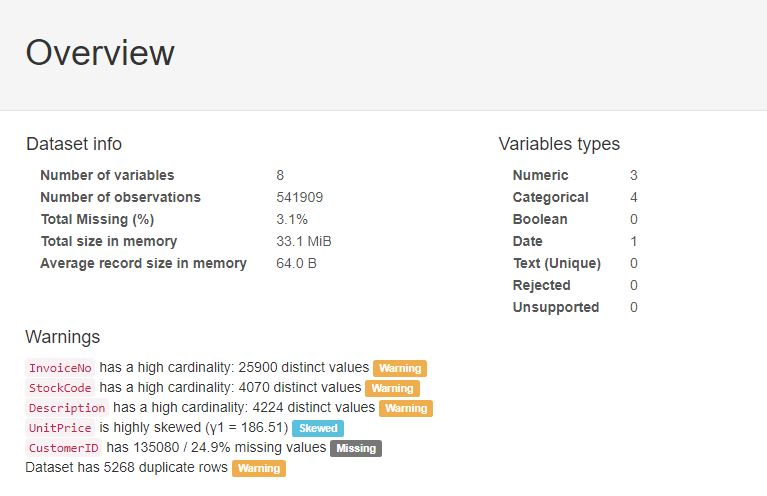

# Data Preprocessing

In [34]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are a lot of missing values in columns `Description` and `CustomerID`.

In [35]:
retail['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

This company is into Online retail in 38 countries.

***Analyze the sales performance of this Online Retail, and provide your insights regarding the same.***

In [36]:
TotalAmount = retail['Quantity'] * retail['UnitPrice']
retail.insert(loc=5,column='TotalAmount',value=TotalAmount)

In [37]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,TotalAmount,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,15.30,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,20.34,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,22.00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,20.34,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,20.34,3.39,17850.0,United Kingdom


In [41]:
new_retail = retail[['CustomerID', 'InvoiceNo', 'StockCode', 'Quantity', 'TotalAmount', 'InvoiceDate', 'Country']]
new_retail.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom


In [43]:
# Grouping countries by TotalAmount of sales

country_price = new_retail.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


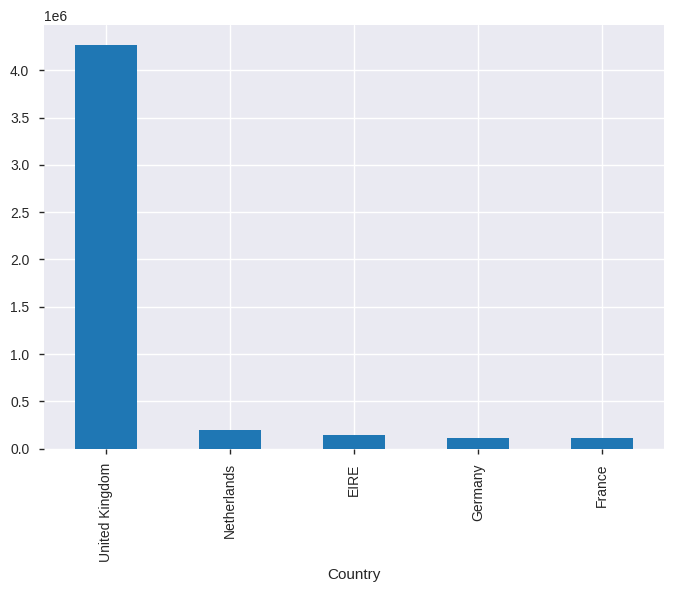

In [46]:
# Top 5 Countries with higher number of purchases

country_price[:5].plot(kind = 'bar')

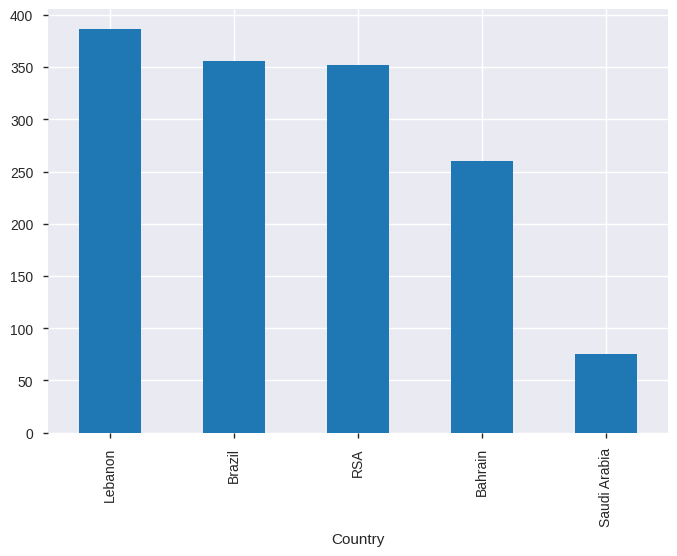

In [48]:
# 5 Countries with the least number of purchases

country_price[33:].plot(kind = 'bar')

In [50]:
# Adding 'Year' feature to the dataset 

timest = new_retail['InvoiceDate'].dt.year

new_retail['Year'] = timest

new_retail.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,Year
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2010
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2010
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,2010


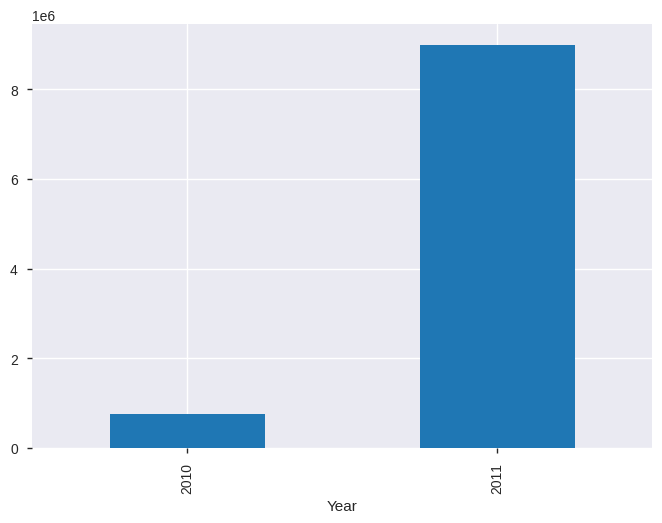

In [51]:
# Total sales for different years

new_retail.groupby('Year')['TotalAmount'].sum().plot(kind = 'bar')

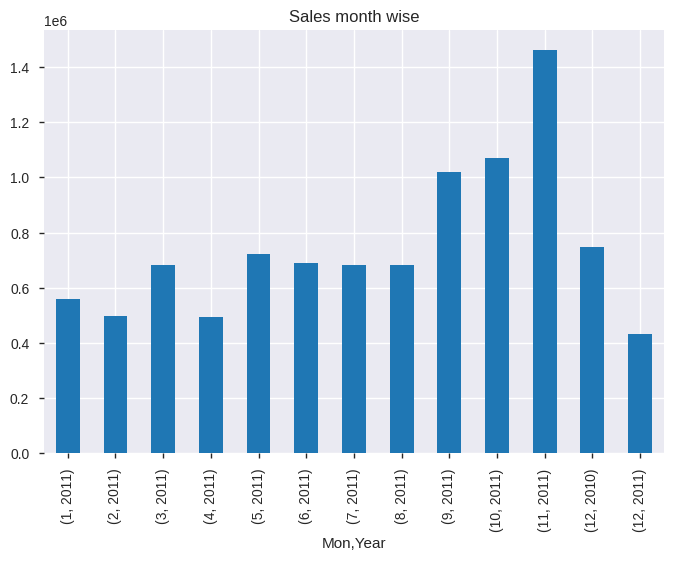

In [52]:
# Sales for different months

new_retail['Mon'] = new_retail['InvoiceDate'].dt.month
new_retail['month'] = new_retail['InvoiceDate'].dt.month_name() 
new_retail.groupby(['Mon','Year'])['TotalAmount'].sum().plot(kind = 'bar', title = 'Sales month wise')

***Performance Analysis***
Sales Performance can be seen with

Number of sales every month

Number of sales every year

We see that in 2010 we have sales only for dec and in 2011 we have sales for all months.

We can see that from September to November 2011 we have very good sales.

**How can the business improve?**

In [53]:
new_retail = new_retail.dropna()
new_retail.isnull().sum()

CustomerID     0
InvoiceNo      0
StockCode      0
Quantity       0
TotalAmount    0
InvoiceDate    0
Country        0
Year           0
Mon            0
month          0
dtype: int64

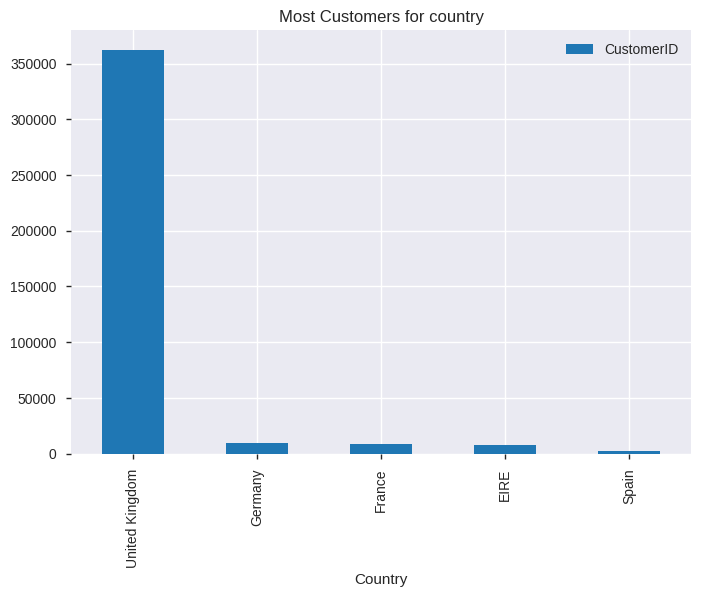

In [54]:
#Countries with more number of customers

cus_id = pd.DataFrame(new_retail.groupby('Country')['CustomerID'].count().sort_values(ascending = False))
cus_id[:5].plot(kind = 'bar', title = 'Most Customers for country')

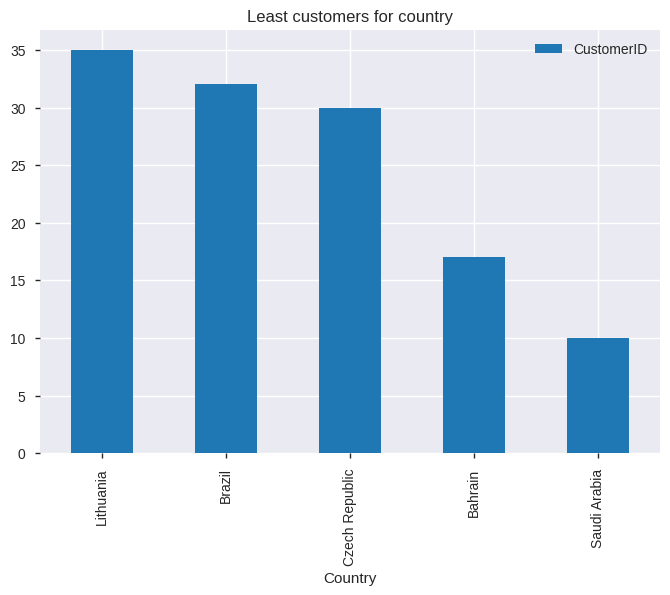

In [55]:
# Countries with less number of customers

cus_id[-5:].plot(kind = 'bar', title = 'Least customers for country')

We see that September to December 2011 we have very high sales.

We can concentrate on improving the sales for the other 8 months.

We find very less number of customers in Lithania, Brazil, Czech Republic, Bahrain, Saudi Arabia.

We have very less sales for Lebanon, Brazil, RSA, Bahrain, Saudi Arabia. We can concentrate on improving their sales.

***We can improve the business by increasing the customers and sales point of view.***